In [1]:
# import modules
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import sklearn.model_selection
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [49]:
# load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.shape, test.shape

((8000, 56), (4000, 55))

In [50]:
# data preprocessing(one-hot encoding)
train = pd.get_dummies(train, columns = ['district'])
test = pd.get_dummies(test, columns = ['district'])
train.shape, test.shape

((8000, 62), (4000, 61))

In [51]:
# extract X and y

X = train.drop(columns = ["y","SEQN"]).values
y = train.y.values

# X = train[["self_eval","teacher_eval","extracurricular","district_1","district_2","district_3","district_4","district_5","district_6","district_7"]].values
# y = train.y.values

In [48]:
# scale X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [52]:
# split training data into train and validation
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [53]:
# convert training data into torch tensors

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1,1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).reshape(-1,1)

# X = torch.tensor(X, dtype=torch.float32)
# y = torch.tensor(y, dtype=torch.float32).reshape(-1,1)

In [7]:
# create network(model)
# raw model
class Net1(nn.Module):
    # constructor
    def __init__(self, H1, H2, D_out):
        super(Net1, self).__init__()
        self.net = nn.Sequential(
            nn.LazyLinear(H1),
            nn.ReLU(),
            nn.LazyLinear(H2),
            nn.ReLU(),
            nn.LazyLinear(D_out))
        
    # prediction
    def forward(self, x):
        return self.net(x)

In [8]:
# create network(model)
# with dropout model
class Net2(nn.Module):
    # constructor
    def __init__(self, H1, H2, D_out):
        super(Net2, self).__init__()
        self.net = nn.Sequential(
            nn.LazyLinear(H1),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            nn.LazyLinear(H2),
            nn.ReLU(),
            nn.LazyLinear(D_out))
        
    # prediction
    def forward(self, x):
        return self.net(x)

In [9]:
# create network(model)
# deeper model
class Net3(nn.Module):
    # constructor
    def __init__(self, H1, H2, H3, H4, H5, H6, D_out):
        super(Net3, self).__init__()
        self.net = nn.Sequential(
            nn.LazyLinear(H1),
            nn.ReLU(),
            nn.LazyLinear(H2),
            nn.ReLU(),
            nn.LazyLinear(H3),
            nn.ReLU(),
#            nn.Dropout(p = 0.2),
            nn.LazyLinear(H4),
            nn.ReLU(),
#            nn.Dropout(p = 0.2),
            nn.LazyLinear(H5),
            nn.ReLU(),
            nn.LazyLinear(H6),
            nn.ReLU(),
            nn.LazyLinear(D_out))
        
    # prediction
    def forward(self, x):
        return self.net(x)

In [69]:
# create network(model)
# deeper model
class Net4(nn.Module):
    # constructor
    def __init__(self, H1, H2, H3, H4, H5, H6, H7, H8, D_out):
        super(Net4, self).__init__()
        self.net = nn.Sequential(
            nn.LazyLinear(H1),
            nn.ReLU(),
#            nn.BatchNorm1d(H1),
            nn.LazyLinear(H2),
            nn.ReLU(),
#            nn.BatchNorm1d(H2),
            nn.LazyLinear(H3),
            nn.ReLU(),
#            nn.BatchNorm1d(H3),
#            nn.Dropout(p = 0.2),
            nn.LazyLinear(H4),
            nn.ReLU(),
#            nn.BatchNorm1d(H4),
#            nn.Dropout(p = 0.5),
            nn.LazyLinear(H5),
            nn.ReLU(),
#            nn.BatchNorm1d(H5),
#            nn.Dropout(p = 0.5),
            nn.LazyLinear(H6),
            nn.ReLU(),
#            nn.BatchNorm1d(H6),
#            nn.Dropout(p = 0.2),
            nn.LazyLinear(H7),
            nn.ReLU(),
#            nn.BatchNorm1d(H7),
            nn.LazyLinear(H8),
            nn.ReLU(),
#            nn.BatchNorm1d(H8),
            nn.LazyLinear(D_out))
        
    # prediction
    def forward(self, x):
        return self.net(x)

In [11]:
# create network(model)
# deeper model with batch normalization
class Net5(nn.Module):
    # constructor
    def __init__(self, H1, H2, H3, H4, H5, H6, D_out):
        super(Net5, self).__init__()
        self.net = nn.Sequential(
            nn.LazyLinear(H1),
            nn.ReLU(),
#            nn.BatchNorm1d(H1),
            nn.LazyLinear(H2),
            nn.ReLU(),
#            nn.BatchNorm1d(H2),
            nn.LazyLinear(H3),
            nn.ReLU(),
#            nn.Dropout(p = 0.2),
#            nn.BatchNorm1d(H3),
            nn.LazyLinear(H4),
            nn.ReLU(),
#            nn.Dropout(p = 0.2),
#            nn.BatchNorm1d(H4),
            nn.LazyLinear(H5),
            nn.ReLU(),
#            nn.BatchNorm1d(H5),
            nn.LazyLinear(H6),
            nn.ReLU(),
#            nn.BatchNorm1d(H6),
            nn.LazyLinear(D_out))
        
    # prediction
    def forward(self, x):
        return self.net(x)

In [12]:
# create loss function(criterion)
mae = nn.L1Loss()
mse = nn.MSELoss()

In [54]:
# create data_loader to split into batches(train_loader and test_loader)
train_loader = DataLoader(dataset=list(zip(X_train,y_train)), batch_size=40, shuffle=True)
test_loader = DataLoader(dataset=list(zip(X_valid,y_valid)), batch_size=40, shuffle=False)

# train_loader = DataLoader(dataset=list(zip(X,y)), batch_size=40, shuffle=True)

In [55]:
# Train with validation loop
def train(model, criterion, train_loader, test_loader, optimizer, epochs = 100):
    metrics = {'training_loss':[], 'validation_loss':[]}
    tbar = tqdm(range(epochs), position=0, leave=True)
    for _ in tbar:
        loss_train_total = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss_train = criterion(z, y)
            loss_train.backward()
            optimizer.step()
            loss_train_total += loss_train.item()
        
        metrics['training_loss'].append(loss_train_total/len(train_loader))
        tbar.set_description(f"Train loss: {loss_train_total/len(train_loader)}")
        
        loss_valid_total = 0
        for x, y in test_loader:
            z = model(x)
            loss_valid = criterion(z, y)
            loss_valid_total += loss_valid.item()
            
        metrics['validation_loss'].append(loss_valid_total/len(test_loader))
            
    return metrics

# Train without validation loop

def train_all(model, criterion, train_loader, optimizer, epochs = 100):
    metrics = {'training_loss':[]}
    tbar = tqdm(range(epochs), position=0, leave=True)
    for _ in tbar:
        loss_train_total = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss_train = criterion(z, y)
            loss_train.backward()
            optimizer.step()
            loss_train_total += loss_train.item()
        
        metrics['training_loss'].append(loss_train_total/len(train_loader))
        tbar.set_description(f"Train loss: {loss_train_total/len(train_loader)}")
            
    return metrics

In [89]:
# create optimizer(optimizer)

# # best result for Net3: epochs = 250
# learning_rate = 0.001
# model = Net3(64, 128, 256, 256, 128, 64, 1)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 0.01)

# # best result for Net3: epochs = 2000, not scale data
# learning_rate = 0.0001
# model = Net3(64, 128, 256, 256, 128, 64, 1)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 0.01)

# best result for Net3: epochs = 2000, not scale data
learning_rate = 0.0001
model = Net3(64, 128, 256, 256, 128, 64, 1)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 0.01, momentum = 0.9)

In [90]:
model_results = train(model, mse, train_loader, test_loader, optimizer, epochs = 500)

Train loss: 0.11240112853702158: 100%|████████████████████████████████████████████████████████| 500/500 [02:32<00:00,  3.28it/s]


In [40]:
# training with all data
model_results = train_all(model, mse, train_loader, optimizer, epochs = 500)

Train loss: 0.19801444478332997: 100%|████████████████████████████████████████████████████████| 500/500 [04:46<00:00,  1.74it/s]


In [91]:
# find the minimum validation loss
min_loss = min(model_results['validation_loss'])
print(f'minimum validation loss: {min_loss}')

# find the epoch of minimum validation loss
epoch_min = model_results['validation_loss'].index(min(model_results['validation_loss']))
print(f'corresponding epoch: {epoch_min}')

# last epoch validation loss
epoch_last = model_results['validation_loss'][-1]
print(f'last epoch: {epoch_last}')

minimum validation loss: 0.3214000713080168
corresponding epoch: 224
last epoch: 0.3649757642298937


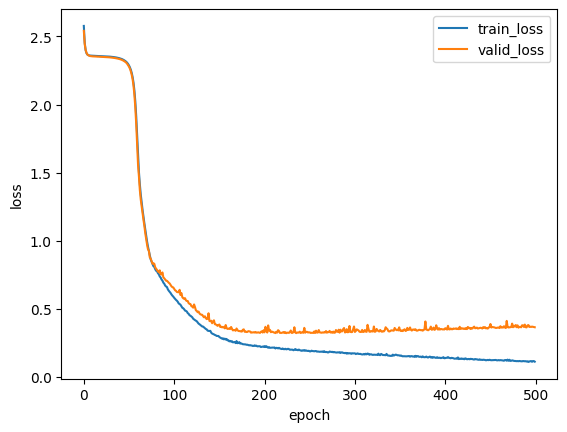

In [92]:
plt.plot(model_results['training_loss'], label = 'train_loss')
plt.plot(model_results['validation_loss'], label = 'valid_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
_ = plt.show()

In [42]:
# predict on test data
X_new = test.drop(columns = ["SEQN"]).values

scaler = StandardScaler()
scaler.fit(X_new)
X_new = scaler.transform(X_new)

X_train = torch.tensor(X_new, dtype=torch.float32)

predict = model(X_train)

submission = pd.DataFrame({'SEQN':test.SEQN,
                           'y':predict.view(-1).detach().numpy()})
submission.to_csv('submission.csv', index=False)